In [1]:
# Letter Recognition Using SVM

In [2]:
## Data Understanding 

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

# importing the dataset
letters = pd.read_csv("train.csv")

In [2]:

# printing dimensions. There are total 42000 rows and 785 columns.
print("Dimensions: ", letters.shape, "\n")

# printing data types. 
print(letters.info())

# head
letters.head()

Dimensions:  (42000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Number of missing values in each column. Seems like there are no missing values so we can skip the step imputing null values.
print(letters.isnull().sum()) 

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


In [40]:
# as the dataset is large, taking only a portion of the dataset for training. We will ocnsider 15% here.
letters_train = letters.sample(n = 6300, random_state = 2) 

In [41]:
letters_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38732,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3686,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30090,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31205,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11331,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
## Data Preparation

In [42]:
# splitting the dataset into X and y
X = letters_train.drop("label", axis = 1)
y = letters_train['label']

In [43]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

In [11]:
## Model Building and evaluation

In [44]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:

# predict
y_pred = model_linear.predict(X_test)

In [46]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8968253968253969 

[[235   0   0   0   0   2   4   0   0   0]
 [  0 278   2   2   0   0   0   0   1   1]
 [  5   3 212   5   2   0   5   4   5   1]
 [  2   5   6 231   1  11   3   3   7   1]
 [  1   2   2   0 240   1   3   0   2   5]
 [  2   3   0  10   3 188   2   1   5   3]
 [  6   1   2   0   1   3 231   0   1   0]
 [  2   2   4   0   8   0   0 224   0   9]
 [  3   7   5  10   0  12   2   1 208   4]
 [  2   1   1   4  18   2   0  22   1 213]]


In [16]:
#The linear model gives approx. 90% accuracy. 

In [47]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [48]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9242063492063493 

[[235   0   0   0   0   3   3   0   0   0]
 [  0 276   3   3   0   0   0   0   2   0]
 [  0   1 222   4   1   1   2   5   6   0]
 [  0   2   8 243   1   5   1   1   7   2]
 [  1   1   5   0 235   2   3   1   1   7]
 [  1   2   3   4   2 196   4   0   5   0]
 [  3   0   3   1   1   5 232   0   0   0]
 [  1   1   8   1   4   0   0 228   0   6]
 [  1   5   5   5   0   7   0   0 227   2]
 [  1   1   5   7   6   2   0   6   1 235]]


In [19]:
#The non-linear model gives approx 92% accuracy.

In [49]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specifying range of hyperparameters
# Setting the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specifying the model
model = SVC(kernel="rbf")

# setting up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fitting the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 37.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [22]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,22.009556,0.628386,2.588678,0.039280,1,0.01,"{'C': 1, 'gamma': 0.01}",0.692744,0.726757,0.713152,...,0.707483,0.012503,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,6.772471,0.362937,1.756030,0.163369,1,0.001,"{'C': 1, 'gamma': 0.001}",0.904762,0.905896,0.927438,...,0.918367,0.010946,6,0.971372,0.976474,0.973639,0.973639,0.972506,0.973526,0.001697
2,10.187772,0.645949,2.261965,0.042909,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.870748,0.877551,0.890023,...,0.882086,0.007206,8,0.907029,0.907880,0.902211,0.905045,0.903061,0.905045,0.002188
3,21.500711,0.396919,2.623348,0.035184,10,0.01,"{'C': 10, 'gamma': 0.01}",0.721088,0.746032,0.735828,...,0.729252,0.010573,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,5.582131,0.045456,1.592341,0.036712,10,0.001,"{'C': 10, 'gamma': 0.001}",0.921769,0.921769,0.933107,...,0.929252,0.007299,1,1.000000,0.999433,0.999433,0.999433,0.999717,0.999603,0.000227
5,4.420491,0.099106,1.508064,0.120653,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.910431,0.911565,0.929705,...,0.921995,0.008996,4,0.964569,0.968821,0.964002,0.964286,0.963719,0.965079,0.001892
6,21.501483,0.489016,2.600820,0.041119,100,0.01,"{'C': 100, 'gamma': 0.01}",0.721088,0.746032,0.735828,...,0.729252,0.010573,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,5.519760,0.134468,1.663237,0.213925,100,0.001,"{'C': 100, 'gamma': 0.001}",0.922902,0.919501,0.930839,...,0.928571,0.007417,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,3.372597,0.075790,1.237989,0.014948,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.909297,0.914966,0.924036,...,0.920862,0.008466,5,0.998299,0.996882,0.997449,0.998299,0.997166,0.997619,0.000584
9,21.373257,0.609235,2.577582,0.055060,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.721088,0.746032,0.735828,...,0.729252,0.010573,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


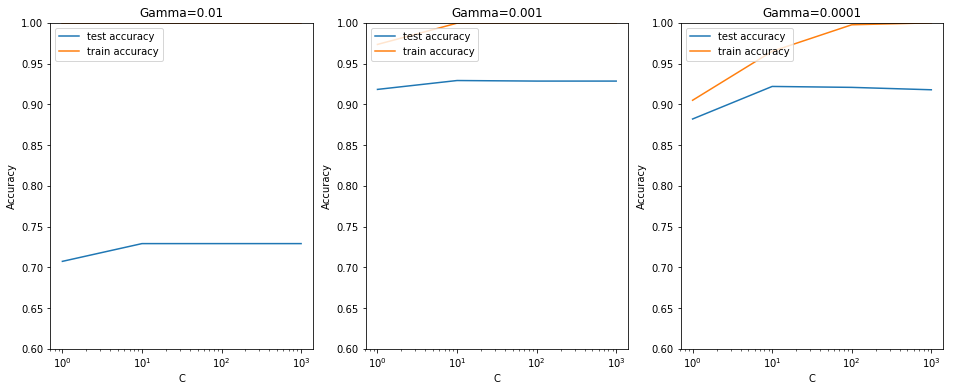

In [23]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [23]:
#The plots above show some useful insights:
#- Non-linear models (high gamma) perform *much better* than the linear ones
#- At any value of gamma, a high value of C leads to better performance


In [24]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9292517006802721 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [38]:
# taking model with optimal hyperparameters

# the model is as below
model = SVC(C=10, gamma=0.001, kernel="rbf")

# fitting the train
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9343915343915344 

[[183   0   1   0   0   0   0   0   0   0]
 [  0 198   3   1   0   0   0   0   1   0]
 [  1   1 209   2   8   0   1   0   0   0]
 [  0   3   5 177   0   4   1   1   5   1]
 [  0   0   0   0 167   0   0   0   0   6]
 [  0   0   3   8   0 154   2   3   1   1]
 [  2   0   4   0   2   1 180   0   1   0]
 [  0   3   4   0   1   0   0 183   0   6]
 [  2   1   3   7   0   5   0   2 161   2]
 [  2   0   5   0   2   0   0   5   1 154]] 



In [34]:
# reading the test data set.
letters_test_data = pd.read_csv("test.csv", nrows=6300)
print(letters_test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 37.7 MB
None


In [37]:
# Scaling the test dataset
letters_test = scale(letters_test_data)

X_train1, X_test1, y_train1, y_test1 = train_test_split(letters_test, y, test_size = 0.3, random_state = 101)

# applying model with optimal hyperparameters

# the model is as below
model1 = SVC(C=10, gamma=0.001, kernel="rbf")

# fitting the train
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

# metrics
print("accuracy", metrics.accuracy_score(y_test1, y_pred1), "\n")
print(metrics.confusion_matrix(y_test1, y_pred1), "\n")

accuracy 0.10317460317460317 

[[28 19 24 20 24 11 16 12 17 13]
 [25 27 23 10 22 16 15 25 19 21]
 [23 39 23 21 22 14 23 24 14 19]
 [19 22 20 17 21 23 25 14 16 20]
 [28 27 15 10 17 15 17 16 15 13]
 [21 14 28 14 14 14 16 20 19 12]
 [17 33 17 18 20 15 24 17 15 14]
 [22 27 27 12 13 23 18 27 15 13]
 [27 23 22 14 14 13 25 21  5 19]
 [26 20 22 17 16  8 15 19 13 13]] 

